In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import json
import pandas.io.sql as sqlio
import psycopg2
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
dict_data = []
headers = []
with open("C:\\Users\\nehas\\HIV.json") as f:
    json_data = json.load(f)
    for val in json_data["meta"]["view"]["columns"]:
        headers.append(val["name"])
    for val in json_data["data"]:
        row = {}
        for i in range(len(val)):
            row[headers[i]] = val[i]
        dict_data.append(row)

print(dict_data)
print(len(dict_data))

[{'sid': 'row-ycwk-zbuw_icwj', 'id': '00000000-0000-0000-51DC-CE7589222431', 'position': 0, 'created_at': 1565986510, 'created_meta': None, 'updated_at': 1565986510, 'updated_meta': None, 'meta': '{ }', 'YEAR': '2013', 'NEIGHBORHOOD': 'High Bridge - Morrisania', 'RACE/ETHNICITY': 'Native American', 'AGE': '30 - 39', 'TOTAL NUMBER OF HIV DIAGNOSES': '0', 'HIV DIAGNOSES PER 100,000 POPULATION': '0', 'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES': '0', 'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES': '0', 'TOTAL NUMBER OF AIDS DIAGNOSES': '0', 'AIDS DIAGNOSES PER 100,000 POPULATION': '0'}, {'sid': 'row-sjqu.mh3t-swqs', 'id': '00000000-0000-0000-F093-CC53D942B1B2', 'position': 0, 'created_at': 1565986510, 'created_meta': None, 'updated_at': 1565986510, 'updated_meta': None, 'meta': '{ }', 'YEAR': '2010', 'NEIGHBORHOOD': 'East Harlem', 'RACE/ETHNICITY': 'Unknown', 'AGE': '40 - 49', 'TOTAL NUMBER OF HIV DIAGNOSES': '0', 'HIV DIAGNOSES PER 100,000 POPULATION': 'NA', 'TO

In [3]:
from pymongo import MongoClient
client = MongoClient(host = '192.168.56.30:27017')
db = client['DAP_Project']

collection = db['Collection_DAP']
#collection.insert_many(dict_data)

In [4]:
import pandas as pd
df = pd.DataFrame(list(collection.find()))
df.shape

(8604, 19)

In [5]:
df.head()

_id                 sid  \
0  606b087953ca084490a5f26a  row-ycwk-zbuw_icwj   
1  606b087953ca084490a5f26b  row-sjqu.mh3t-swqs   
2  606b087953ca084490a5f26c  row-fhrb-3fg7~jkg6   
3  606b087953ca084490a5f26d  row-896j~v6cc.snxv   
4  606b087953ca084490a5f26e  row-8whp~aiuf_xrxe   

                                     id  position  created_at created_meta  \
0  00000000-0000-0000-51DC-CE7589222431         0  1565986510         None   
1  00000000-0000-0000-F093-CC53D942B1B2         0  1565986510         None   
2  00000000-0000-0000-2521-D92DF6BE4143         0  1565986510         None   
3  00000000-0000-0000-2FC4-F8B20735259B         0  1565986510         None   
4  00000000-0000-0000-A6F5-3C44046953C9         0  1565986510         None   

   updated_at updated_meta meta  YEAR                NEIGHBORHOOD  \
0  1565986510         None  { }  2013    High Bridge - Morrisania   
1  1565986510         None  { }  2010                 East Harlem   
2  1565986510         None  { }  2011    High Bridge - Morrisania   
3  1565986510         None  { }  2012    Greenwich Village - SoHo   
4  1565986510         None  { }  2011  Long Island City - Astoria   

    RACE/ETHNICITY      AGE TOTAL NUMBER OF HIV DIAGNOSES  \
0  Native American  30 - 39                             0   
1          Unknown  40 - 49                             0   
2          Unknown  40 - 49                             0   
3  Native American  50 - 59                             0   
4      Multiracial  20 - 29                             0   

  HIV DIAGNOSES PER 100,000 POPULATION  \
0                                    0   
1                                   NA   
2                                   NA   
3                                    0   
4                                    0   

  TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES  \
0                                                  0                    
1                                                 NA                    
2                                                 NA                    
3                                                  0                    
4                                                  0                    

  TOTAL NUMBER OF AIDS DIAGNOSES AIDS DIAGNOSES PER 100,000 POPULATION  
0                              0                                     0  
1                              0                                    NA  
2                              0                                    NA  
3                              0                                     0  
4                              0                                     0

In [6]:
df = df.drop(columns = df.columns[0:9])

In [7]:
df.head()

YEAR                NEIGHBORHOOD   RACE/ETHNICITY      AGE  \
0  2013    High Bridge - Morrisania  Native American  30 - 39   
1  2010                 East Harlem          Unknown  40 - 49   
2  2011    High Bridge - Morrisania          Unknown  40 - 49   
3  2012    Greenwich Village - SoHo  Native American  50 - 59   
4  2011  Long Island City - Astoria      Multiracial  20 - 29   

  TOTAL NUMBER OF HIV DIAGNOSES HIV DIAGNOSES PER 100,000 POPULATION  \
0                             0                                    0   
1                             0                                   NA   
2                             0                                   NA   
3                             0                                    0   
4                             0                                    0   

  TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES  \
0                                                  0                    
1                                                 NA                    
2                                                 NA                    
3                                                  0                    
4                                                  0                    

  TOTAL NUMBER OF AIDS DIAGNOSES AIDS DIAGNOSES PER 100,000 POPULATION  
0                              0                                     0  
1                              0                                    NA  
2                              0                                    NA  
3                              0                                     0  
4                              0                                     0

In [8]:
df.isnull().sum()

YEAR                                                                   0
NEIGHBORHOOD                                                           0
RACE/ETHNICITY                                                         0
AGE                                                                    0
TOTAL NUMBER OF HIV DIAGNOSES                                          0
HIV DIAGNOSES PER 100,000 POPULATION                                   0
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          0
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    0
TOTAL NUMBER OF AIDS DIAGNOSES                                         0
AIDS DIAGNOSES PER 100,000 POPULATION                                  0
dtype: int64

In [9]:
print((df.iloc[:] == '*').sum())

YEAR                                                                     0
NEIGHBORHOOD                                                             0
RACE/ETHNICITY                                                           0
AGE                                                                      0
TOTAL NUMBER OF HIV DIAGNOSES                                          113
HIV DIAGNOSES PER 100,000 POPULATION                                   113
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                           34
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES     34
TOTAL NUMBER OF AIDS DIAGNOSES                                          75
AIDS DIAGNOSES PER 100,000 POPULATION                                   75
dtype: int64


In [10]:
df = df[df['TOTAL NUMBER OF HIV DIAGNOSES'] != '*']

In [11]:
print((df.iloc[:] == '*').sum())

YEAR                                                                    0
NEIGHBORHOOD                                                            0
RACE/ETHNICITY                                                          0
AGE                                                                     0
TOTAL NUMBER OF HIV DIAGNOSES                                           0
HIV DIAGNOSES PER 100,000 POPULATION                                    0
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                           0
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES     0
TOTAL NUMBER OF AIDS DIAGNOSES                                         33
AIDS DIAGNOSES PER 100,000 POPULATION                                  33
dtype: int64


In [12]:
df = df[df['TOTAL NUMBER OF AIDS DIAGNOSES'] != '*']

In [13]:
print((df.iloc[:] == '*').sum())

YEAR                                                                   0
NEIGHBORHOOD                                                           0
RACE/ETHNICITY                                                         0
AGE                                                                    0
TOTAL NUMBER OF HIV DIAGNOSES                                          0
HIV DIAGNOSES PER 100,000 POPULATION                                   0
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          0
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    0
TOTAL NUMBER OF AIDS DIAGNOSES                                         0
AIDS DIAGNOSES PER 100,000 POPULATION                                  0
dtype: int64


In [14]:
df.shape #8604 previously

(8458, 10)

In [15]:
print((df.iloc[:] == 'All').sum())

YEAR                                                                      0
NEIGHBORHOOD                                                              4
RACE/ETHNICITY                                                          176
AGE                                                                    1370
TOTAL NUMBER OF HIV DIAGNOSES                                             0
HIV DIAGNOSES PER 100,000 POPULATION                                      0
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                             0
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES       0
TOTAL NUMBER OF AIDS DIAGNOSES                                            0
AIDS DIAGNOSES PER 100,000 POPULATION                                     0
dtype: int64


In [16]:
df['AGE'].unique()

array(['30 - 39', '40 - 49', '50 - 59', '20 - 29', 'All', '0 - 19', '60+'],
      dtype=object)

In [17]:
df['RACE/ETHNICITY'].unique()

array(['Native American', 'Unknown', 'Multiracial', 'Hispanic', 'All',
       'Asian/Pacific Islander', 'Black', 'White'], dtype=object)

In [18]:
df['YEAR'].unique()

array(['2013', '2010', '2011', '2012'], dtype=object)

In [19]:
df['NEIGHBORHOOD'].unique()

array(['High Bridge - Morrisania', 'East Harlem',
       'Greenwich Village - SoHo', 'Long Island City - Astoria',
       'Upper Eastside', 'West Queens', 'Chelsea - Clinton',
       'Southeast Queens', 'Unknown', 'East New York',
       'East Flatbush - Flatbush', 'Greenpoint', 'Canarsie - Flatlands',
       'Port Richmond', 'Central Harlem - Morningside Heights',
       'Hunts Point - Mott Haven', 'Williamsburg - Bushwick', 'Jamaica',
       'Lower Manhattan', 'Pelham - Throgs Neck', 'Crotona - Tremont',
       'Fordham - Bronx Park', 'Ridgewood - Forest Hills',
       'Downtown - Heights - Park Slope', 'Kingsbridge - Riverdale',
       'Flushing - Clearview', 'Washington Heights - Inwood',
       'Stapleton - St. George', 'Willowbrook',
       'Union Square - Lower Eastside', 'Borough Park',
       'South Beach - Tottenville', 'Fresh Meadows',
       'Bayside - Little Neck', 'Sunset Park', 'Southwest Queens',
       'Upper Westside', 'Coney Island - Sheepshead Bay', 'Rockaway',
    

In [20]:
df = df.drop(columns = df.columns[1])

In [21]:
df.head()

YEAR   RACE/ETHNICITY      AGE TOTAL NUMBER OF HIV DIAGNOSES  \
0  2013  Native American  30 - 39                             0   
1  2010          Unknown  40 - 49                             0   
2  2011          Unknown  40 - 49                             0   
3  2012  Native American  50 - 59                             0   
4  2011      Multiracial  20 - 29                             0   

  HIV DIAGNOSES PER 100,000 POPULATION  \
0                                    0   
1                                   NA   
2                                   NA   
3                                    0   
4                                    0   

  TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES  \
0                                                  0                    
1                                                 NA                    
2                                                 NA                    
3                                                  0                    
4                                                  0                    

  TOTAL NUMBER OF AIDS DIAGNOSES AIDS DIAGNOSES PER 100,000 POPULATION  
0                              0                                     0  
1                              0                                    NA  
2                              0                                    NA  
3                              0                                     0  
4                              0                                     0

In [22]:
df.head()

YEAR   RACE/ETHNICITY      AGE TOTAL NUMBER OF HIV DIAGNOSES  \
0  2013  Native American  30 - 39                             0   
1  2010          Unknown  40 - 49                             0   
2  2011          Unknown  40 - 49                             0   
3  2012  Native American  50 - 59                             0   
4  2011      Multiracial  20 - 29                             0   

  HIV DIAGNOSES PER 100,000 POPULATION  \
0                                    0   
1                                   NA   
2                                   NA   
3                                    0   
4                                    0   

  TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES  \
0                                                  0                    
1                                                 NA                    
2                                                 NA                    
3                                                  0                    
4                                                  0                    

  TOTAL NUMBER OF AIDS DIAGNOSES AIDS DIAGNOSES PER 100,000 POPULATION  
0                              0                                     0  
1                              0                                    NA  
2                              0                                    NA  
3                              0                                     0  
4                              0                                     0

In [23]:
df = df.replace("NA", np.nan)

In [24]:
df.isna().sum()

YEAR                                                                      0
RACE/ETHNICITY                                                            0
AGE                                                                       0
TOTAL NUMBER OF HIV DIAGNOSES                                             0
HIV DIAGNOSES PER 100,000 POPULATION                                   1376
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                             0
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    1376
TOTAL NUMBER OF AIDS DIAGNOSES                                            0
AIDS DIAGNOSES PER 100,000 POPULATION                                  1376
dtype: int64

In [25]:
df['TOTAL NUMBER OF HIV DIAGNOSES'] = pd.to_numeric(df['TOTAL NUMBER OF HIV DIAGNOSES'])
df['HIV DIAGNOSES PER 100,000 POPULATION'] = pd.to_numeric(df['HIV DIAGNOSES PER 100,000 POPULATION'])
df['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'] = pd.to_numeric(df['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'])
df['PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES'] = pd.to_numeric(df['PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES'])
df['TOTAL NUMBER OF AIDS DIAGNOSES'] = pd.to_numeric(df['TOTAL NUMBER OF AIDS DIAGNOSES'])
df['AIDS DIAGNOSES PER 100,000 POPULATION'] = pd.to_numeric(df['AIDS DIAGNOSES PER 100,000 POPULATION'])

In [26]:
df.isna().sum()

YEAR                                                                      0
RACE/ETHNICITY                                                            0
AGE                                                                       0
TOTAL NUMBER OF HIV DIAGNOSES                                             0
HIV DIAGNOSES PER 100,000 POPULATION                                   1376
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                             0
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    1376
TOTAL NUMBER OF AIDS DIAGNOSES                                            0
AIDS DIAGNOSES PER 100,000 POPULATION                                  1376
dtype: int64

In [27]:
mean1 = df['HIV DIAGNOSES PER 100,000 POPULATION'].mean()
mean2 = df['PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES'].mean()
mean3 = df['AIDS DIAGNOSES PER 100,000 POPULATION'].mean()
print(mean1," ",mean2," ",mean3)

28.431008189776897   9.23162948319687   20.452852301609678


In [28]:
df['HIV DIAGNOSES PER 100,000 POPULATION']=df['HIV DIAGNOSES PER 100,000 POPULATION'].fillna(mean1)
df['PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES']=df['PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES'].fillna(mean2)
df['AIDS DIAGNOSES PER 100,000 POPULATION']=df['AIDS DIAGNOSES PER 100,000 POPULATION'].fillna(mean3)

In [29]:
df.isna().sum()

YEAR                                                                   0
RACE/ETHNICITY                                                         0
AGE                                                                    0
TOTAL NUMBER OF HIV DIAGNOSES                                          0
HIV DIAGNOSES PER 100,000 POPULATION                                   0
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          0
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    0
TOTAL NUMBER OF AIDS DIAGNOSES                                         0
AIDS DIAGNOSES PER 100,000 POPULATION                                  0
dtype: int64

In [30]:
df.head()

YEAR   RACE/ETHNICITY      AGE  TOTAL NUMBER OF HIV DIAGNOSES  \
0  2013  Native American  30 - 39                              0   
1  2010          Unknown  40 - 49                              0   
2  2011          Unknown  40 - 49                              0   
3  2012  Native American  50 - 59                              0   
4  2011      Multiracial  20 - 29                              0   

   HIV DIAGNOSES PER 100,000 POPULATION  \
0                              0.000000   
1                             28.431008   
2                             28.431008   
3                              0.000000   
4                              0.000000   

   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES  \
0                                           0.000000                     
1                                           9.231629                     
2                                           9.231629                     
3                                           0.000000                     
4                                           0.000000                     

   TOTAL NUMBER OF AIDS DIAGNOSES  AIDS DIAGNOSES PER 100,000 POPULATION  
0                               0                               0.000000  
1                               0                              20.452852  
2                               0                              20.452852  
3                               0                               0.000000  
4                               0                               0.000000

In [31]:
df.shape

(8458, 9)

In [32]:
#generate dictionary for race:
df['RACE/ETHNICITY'] = df['RACE/ETHNICITY'].astype('category')
racedict = dict(enumerate(df['RACE/ETHNICITY'].cat.categories))
print (racedict)

{0: 'All', 1: 'Asian/Pacific Islander', 2: 'Black', 3: 'Hispanic', 4: 'Multiracial', 5: 'Native American', 6: 'Unknown', 7: 'White'}


In [33]:
#generate dictionary for age:
df['AGE'] = df['AGE'].astype('category')
agedict = dict(enumerate(df['AGE'].cat.categories))
print (agedict)

{0: '0 - 19', 1: '20 - 29', 2: '30 - 39', 3: '40 - 49', 4: '50 - 59', 5: '60+', 6: 'All'}


In [34]:
#generate dictionary for year:
df['YEAR'] = df['YEAR'].astype('category')
yeardict = dict(enumerate(df['YEAR'].cat.categories))
print (yeardict)

{0: '2010', 1: '2011', 2: '2012', 3: '2013'}


In [35]:
df['AGE'] = df['AGE'].cat.codes
df['YEAR'] = df['YEAR'].cat.codes
df['RACE/ETHNICITY'] = df['RACE/ETHNICITY'].cat.codes

In [36]:
df.head()

YEAR  RACE/ETHNICITY  AGE  TOTAL NUMBER OF HIV DIAGNOSES  \
0     3               5    2                              0   
1     0               6    3                              0   
2     1               6    3                              0   
3     2               5    4                              0   
4     1               4    1                              0   

   HIV DIAGNOSES PER 100,000 POPULATION  \
0                              0.000000   
1                             28.431008   
2                             28.431008   
3                              0.000000   
4                              0.000000   

   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES  \
0                                           0.000000                     
1                                           9.231629                     
2                                           9.231629                     
3                                           0.000000                     
4                                           0.000000                     

   TOTAL NUMBER OF AIDS DIAGNOSES  AIDS DIAGNOSES PER 100,000 POPULATION  
0                               0                               0.000000  
1                               0                              20.452852  
2                               0                              20.452852  
3                               0                               0.000000  
4                               0                               0.000000

In [37]:
z = np.abs(stats.zscore(df))
print(z)

[[1.34526523e+00 5.24634323e-01 5.23424031e-01 ... 4.77302553e-01
  8.34015107e-02 4.46267317e-01]
 [1.34081912e+00 1.00969741e+00 3.14124224e-02 ... 1.46948645e-15
  8.34015107e-02 6.20142355e-16]
 [4.45457672e-01 1.00969741e+00 3.14124224e-02 ... 1.46948645e-15
  8.34015107e-02 6.20142355e-16]
 ...
 [1.34081912e+00 1.90068110e+00 1.44462240e+00 ... 1.46948645e-15
  4.39803135e+00 6.20142355e-16]
 [1.34526523e+00 1.49476049e+00 9.52610795e-01 ... 4.77302553e-01
  8.34015107e-02 4.46267317e-01]
 [1.34081912e+00 5.24634323e-01 1.50744725e+00 ... 4.77302553e-01
  8.34015107e-02 4.46267317e-01]]


In [38]:
print(np.where(z > 2))
print(len(np.where(z>2)[0]))
drop_rows = list(np.where(z>2)[0])
print(len(drop_rows))

(array([   7,   33,   37, ..., 8455, 8455, 8455], dtype=int64), array([3, 6, 7, ..., 3, 5, 7], dtype=int64))
1285
1285


In [39]:
df = df.drop(df.index[drop_rows])#984 rows dropped

In [40]:
df.shape

(7474, 9)

In [41]:
df.head()

YEAR  RACE/ETHNICITY  AGE  TOTAL NUMBER OF HIV DIAGNOSES  \
0     3               5    2                              0   
1     0               6    3                              0   
2     1               6    3                              0   
3     2               5    4                              0   
4     1               4    1                              0   

   HIV DIAGNOSES PER 100,000 POPULATION  \
0                              0.000000   
1                             28.431008   
2                             28.431008   
3                              0.000000   
4                              0.000000   

   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES  \
0                                           0.000000                     
1                                           9.231629                     
2                                           9.231629                     
3                                           0.000000                     
4                                           0.000000                     

   TOTAL NUMBER OF AIDS DIAGNOSES  AIDS DIAGNOSES PER 100,000 POPULATION  
0                               0                               0.000000  
1                               0                              20.452852  
2                               0                              20.452852  
3                               0                               0.000000  
4                               0                               0.000000

In [42]:
df['YEAR'] = df['YEAR'].map(yeardict)
df['RACE/ETHNICITY'] = df['RACE/ETHNICITY'].map(racedict)
df['AGE'] = df['AGE'].map(agedict)

In [43]:
df.head()

YEAR   RACE/ETHNICITY      AGE  TOTAL NUMBER OF HIV DIAGNOSES  \
0  2013  Native American  30 - 39                              0   
1  2010          Unknown  40 - 49                              0   
2  2011          Unknown  40 - 49                              0   
3  2012  Native American  50 - 59                              0   
4  2011      Multiracial  20 - 29                              0   

   HIV DIAGNOSES PER 100,000 POPULATION  \
0                              0.000000   
1                             28.431008   
2                             28.431008   
3                              0.000000   
4                              0.000000   

   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES  \
0                                           0.000000                     
1                                           9.231629                     
2                                           9.231629                     
3                                           0.000000                     
4                                           0.000000                     

   TOTAL NUMBER OF AIDS DIAGNOSES  AIDS DIAGNOSES PER 100,000 POPULATION  
0                               0                               0.000000  
1                               0                              20.452852  
2                               0                              20.452852  
3                               0                               0.000000  
4                               0                               0.000000

In [44]:
print((df.iloc[:] == 0).sum())

YEAR                                                                      0
RACE/ETHNICITY                                                            0
AGE                                                                       0
TOTAL NUMBER OF HIV DIAGNOSES                                          5276
HIV DIAGNOSES PER 100,000 POPULATION                                   4021
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          6438
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    5137
TOTAL NUMBER OF AIDS DIAGNOSES                                         5669
AIDS DIAGNOSES PER 100,000 POPULATION                                  4407
dtype: int64


In [45]:
df = df.replace(0, np.nan)

C:\Users\nehas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nehas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nehas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='AIDS DIAGNOSES PER 100,000 POPULATION', ylabel='Density'>

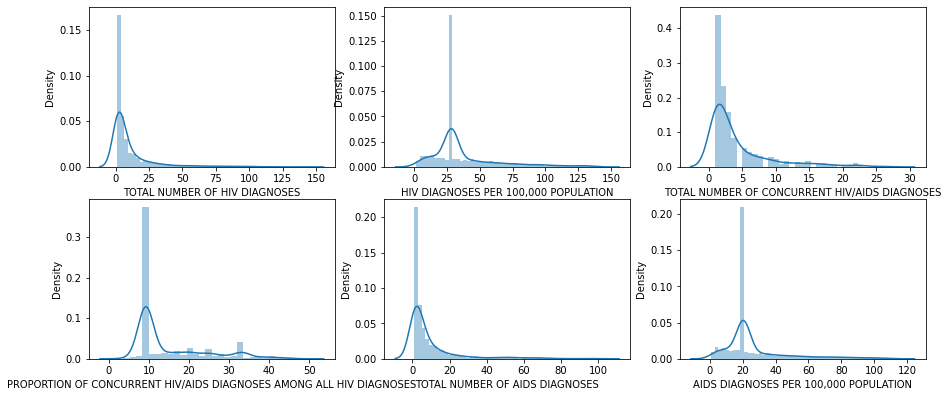

In [46]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.distplot(df['TOTAL NUMBER OF HIV DIAGNOSES'])
plt.subplot(3, 3, 2)
sns.distplot(df['HIV DIAGNOSES PER 100,000 POPULATION'])
plt.subplot(3, 3, 3)
sns.distplot(df['TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES'])
plt.subplot(3, 3, 4)
sns.distplot(df['PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES'])
plt.subplot(3, 3, 5)
sns.distplot(df['TOTAL NUMBER OF AIDS DIAGNOSES'])
plt.subplot(3, 3, 6)
sns.distplot(df['AIDS DIAGNOSES PER 100,000 POPULATION'])
# plt.subplot(3, 3, 7)
# sns.distplot(df['YEAR'])
# plt.subplot(3, 3, 1)
# sns.distplot(df['AGE'])
# plt.subplot(3, 3, 8)
# sns.distplot(df['RACE/ETHNICITY'])

(array([1020.,  948.,    0., 1006.,    0., 1019., 1213.,    0., 1180.,
        1088.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

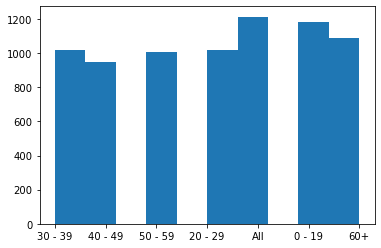

In [47]:
plt.hist(df['AGE'])

(array([1171., 1204., 1145.,    0.,  982., 1096.,    0.,  136.,  723.,
        1017.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

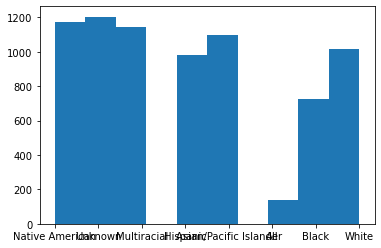

In [48]:
plt.hist(df['RACE/ETHNICITY'])

(array([1886.,    0.,    0., 1829.,    0.,    0., 1846.,    0.,    0.,
        1913.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

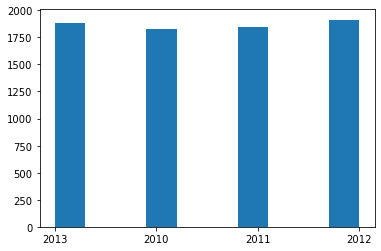

In [49]:
plt.hist(df['YEAR'])

In [50]:
df.head()

YEAR   RACE/ETHNICITY      AGE  TOTAL NUMBER OF HIV DIAGNOSES  \
0  2013  Native American  30 - 39                            NaN   
1  2010          Unknown  40 - 49                            NaN   
2  2011          Unknown  40 - 49                            NaN   
3  2012  Native American  50 - 59                            NaN   
4  2011      Multiracial  20 - 29                            NaN   

   HIV DIAGNOSES PER 100,000 POPULATION  \
0                                   NaN   
1                             28.431008   
2                             28.431008   
3                                   NaN   
4                                   NaN   

   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   

   PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES  \
0                                                NaN                     
1                                           9.231629                     
2                                           9.231629                     
3                                                NaN                     
4                                                NaN                     

   TOTAL NUMBER OF AIDS DIAGNOSES  AIDS DIAGNOSES PER 100,000 POPULATION  
0                             NaN                                    NaN  
1                             NaN                              20.452852  
2                             NaN                              20.452852  
3                             NaN                                    NaN  
4                             NaN                                    NaN

In [51]:
df = df.replace(np.nan, 0)

In [52]:
df.head()

YEAR   RACE/ETHNICITY      AGE  TOTAL NUMBER OF HIV DIAGNOSES  \
0  2013  Native American  30 - 39                            0.0   
1  2010          Unknown  40 - 49                            0.0   
2  2011          Unknown  40 - 49                            0.0   
3  2012  Native American  50 - 59                            0.0   
4  2011      Multiracial  20 - 29                            0.0   

   HIV DIAGNOSES PER 100,000 POPULATION  \
0                              0.000000   
1                             28.431008   
2                             28.431008   
3                              0.000000   
4                              0.000000   

   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES  \
0                                           0.000000                     
1                                           9.231629                     
2                                           9.231629                     
3                                           0.000000                     
4                                           0.000000                     

   TOTAL NUMBER OF AIDS DIAGNOSES  AIDS DIAGNOSES PER 100,000 POPULATION  
0                             0.0                               0.000000  
1                             0.0                              20.452852  
2                             0.0                              20.452852  
3                             0.0                               0.000000  
4                             0.0                               0.000000

In [53]:
import psycopg2
try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "192.168.56.30",
    port = "5432",
  database = "postgres")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute("CREATE DATABASE healthdata;")
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

Error while connecting to PostgreSQL database "healthdata" already exists



In [54]:
df.head()

YEAR   RACE/ETHNICITY      AGE  TOTAL NUMBER OF HIV DIAGNOSES  \
0  2013  Native American  30 - 39                            0.0   
1  2010          Unknown  40 - 49                            0.0   
2  2011          Unknown  40 - 49                            0.0   
3  2012  Native American  50 - 59                            0.0   
4  2011      Multiracial  20 - 29                            0.0   

   HIV DIAGNOSES PER 100,000 POPULATION  \
0                              0.000000   
1                             28.431008   
2                             28.431008   
3                              0.000000   
4                              0.000000   

   TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES  \
0                                           0.000000                     
1                                           9.231629                     
2                                           9.231629                     
3                                           0.000000                     
4                                           0.000000                     

   TOTAL NUMBER OF AIDS DIAGNOSES  AIDS DIAGNOSES PER 100,000 POPULATION  
0                             0.0                               0.000000  
1                             0.0                              20.452852  
2                             0.0                              20.452852  
3                             0.0                               0.000000  
4                             0.0                               0.000000

In [55]:
df = df.rename(columns = {'RACE/ETHNICITY':'RACE_ETHNICITY'})
df = df.rename(columns = {'TOTAL NUMBER OF HIV DIAGNOSES':'HIV_DIAGNOSES'})
df = df.rename(columns = {'HIV DIAGNOSES PER 100,000 POPULATION':'HIV_DIAGNOSES_PER_1000_POPULATION'})
df = df.rename(columns = {'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES':'CONCURRENT_HIV_AND_AIDS_DIAGNOSES'})
df = df.rename(columns = {'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES':'PROPORTION_OF_CONCURRENT_HIV_AND_AIDS_DIAGNOSES_AMONG_ALL_HIV_DIAGNOSES'})
df = df.rename(columns = {'TOTAL NUMBER OF AIDS DIAGNOSES':'AIDS_DIAGNOSES'})
df = df.rename(columns = {'AIDS DIAGNOSES PER 100,000 POPULATION':'AIDS_DIAGNOSES_PER_1000_POPULATION'})

In [56]:
df.head()

YEAR   RACE_ETHNICITY      AGE  HIV_DIAGNOSES  \
0  2013  Native American  30 - 39            0.0   
1  2010          Unknown  40 - 49            0.0   
2  2011          Unknown  40 - 49            0.0   
3  2012  Native American  50 - 59            0.0   
4  2011      Multiracial  20 - 29            0.0   

   HIV_DIAGNOSES_PER_1000_POPULATION  CONCURRENT_HIV_AND_AIDS_DIAGNOSES  \
0                           0.000000                                0.0   
1                          28.431008                                0.0   
2                          28.431008                                0.0   
3                           0.000000                                0.0   
4                           0.000000                                0.0   

   PROPORTION_OF_CONCURRENT_HIV_AND_AIDS_DIAGNOSES_AMONG_ALL_HIV_DIAGNOSES  \
0                                           0.000000                         
1                                           9.231629                         
2                                           9.231629                         
3                                           0.000000                         
4                                           0.000000                         

   AIDS_DIAGNOSES  AIDS_DIAGNOSES_PER_1000_POPULATION  
0             0.0                            0.000000  
1             0.0                           20.452852  
2             0.0                           20.452852  
3             0.0                            0.000000  
4             0.0                            0.000000

In [57]:
createString = """
CREATE TABLE HIV(
YEAR integer,
RACE_ETHNICITY varchar,
AGE varchar,
HIV_DIAGNOSES numeric(6,2),
HIV_DIAGNOSES_PER_1000_POPULATION numeric(6,2),
CONCURRENT_HIV_AND_AIDS_DIAGNOSES numeric(6,2),
PROPORTION_OF_CONCURRENT_HIV_AND_AIDS_DIAGNOSES_AMONG_ALL_HIV_DIAGNOSES numeric(6,2),
AIDS_DIAGNOSES numeric(6,2),
AIDS_DIAGNOSES_PER_1000_POPULATION numeric(6,2)
);
"""
try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "192.168.56.30",
    port = "5432",
    database = "healthdata")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute(createString)
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [58]:
# Creating a list of tupples from the dataframe values
tpls = [tuple(x) for x in df.to_numpy()]
    
# dataframe columns with Comma-separated
cols = ','.join(list(df.columns))
  
table = "HIV"

# SQL query to execute
sql = "INSERT INTO %s(%s) VALUES(%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s,%%s)" % (table, cols)

try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "192.168.56.30",
    port = "5432",
    database = "healthdata")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.executemany(sql, tpls)
    print("Data inserted using execute_many() successfully...")
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

Data inserted using execute_many() successfully...


In [59]:
sql = """SELECT * FROM HIV;"""
try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "192.168.56.30",
    port = "5432",
    database = "healthdata")
    healthdf = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [60]:
healthdf

year   race_ethnicity      age  hiv_diagnoses  \
0     2013  Native American  30 - 39            0.0   
1     2010          Unknown  40 - 49            0.0   
2     2011          Unknown  40 - 49            0.0   
3     2012  Native American  50 - 59            0.0   
4     2011      Multiracial  20 - 29            0.0   
...    ...              ...      ...            ...   
7469  2010      Multiracial  50 - 59            0.0   
7470  2013  Native American      60+            0.0   
7471  2012            Black   0 - 19            3.0   
7472  2013            White      60+            0.0   
7473  2010  Native American   0 - 19            0.0   

      hiv_diagnoses_per_1000_population  concurrent_hiv_and_aids_diagnoses  \
0                                  0.00                                0.0   
1                                 28.43                                0.0   
2                                 28.43                                0.0   
3                                  0.00                                0.0   
4                                  0.00                                0.0   
...                                 ...                                ...   
7469                               0.00                                0.0   
7470                               0.00                                0.0   
7471                               9.30                                0.0   
7472                               0.00                                0.0   
7473                               0.00                                0.0   

      proportion_of_concurrent_hiv_and_aids_diagnoses_among_all_hiv_d  \
0                                                  0.00                 
1                                                  9.23                 
2                                                  9.23                 
3                                                  0.00                 
4                                                  0.00                 
...                                                 ...                 
7469                                               0.00                 
7470                                               0.00                 
7471                                               0.00                 
7472                                               0.00                 
7473                                               0.00                 

      aids_diagnoses  aids_diagnoses_per_1000_population  
0                0.0                                0.00  
1                0.0                               20.45  
2                0.0                               20.45  
3                0.0                                0.00  
4                0.0                                0.00  
...              ...                                 ...  
7469             0.0                                0.00  
7470             0.0                                0.00  
7471             0.0                                0.00  
7472             0.0                                0.00  
7473             0.0                                0.00  

[7474 rows x 9 columns]

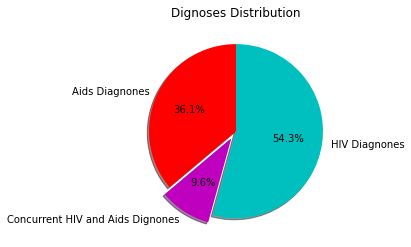

In [61]:
slices = (healthdf['aids_diagnoses'].sum(),healthdf['concurrent_hiv_and_aids_diagnoses'].sum(),healthdf['hiv_diagnoses'].sum())
name = ['Aids Diagnones','Concurrent HIV and Aids Dignones','HIV Diagnones']
cols = ['r','m','c']
plt.pie(slices, labels = name, colors = cols, startangle = 90, shadow = True, explode = (0,0.1,0), autopct = '%1.1f%%')
plt.title('Dignoses Distribution')
plt.show()

#below pie chart indicates that almost 10 percent of the people have been diagnosed with Aids and HIV 

C:\Users\nehas\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


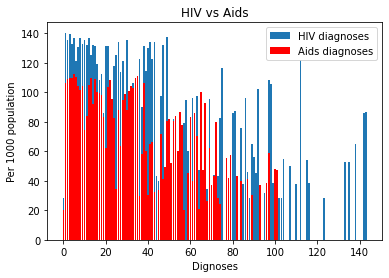

In [62]:
plt.bar(healthdf['hiv_diagnoses'],healthdf['hiv_diagnoses_per_1000_population'], label = "HIV diagnoses")
plt.bar(healthdf['aids_diagnoses'],healthdf['aids_diagnoses_per_1000_population'], label = "Aids diagnoses", color = 'r')
plt.legend()
plt.xlabel('Dignoses')
plt.ylabel('Per 1000 population')
plt.title('HIV vs Aids')
plt.show()
#Below bar graph indicates HIV diagnones per 1000 population is greater than that of the Aids diagnoses

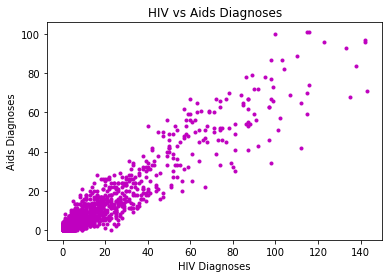

In [63]:
plt.scatter(healthdf['hiv_diagnoses'],healthdf['aids_diagnoses'], color = 'm', marker = '.')
plt.xlabel('HIV Diagnoses')
plt.ylabel('Aids Diagnoses')
plt.title('HIV vs Aids Diagnoses')
plt.show()
#Below scatterplot indicates that the chance of a HIV positive person having Aids as well is more due to multicollinearty
#Person if treated intime for HIV will have a less chance to develop Aids as well. But if HIV is untreated he/her  
#may result into having been diagnosed for Aids as well.

In [64]:
hist1 = healthdf.groupby(['age','race_ethnicity'],as_index=False).sum()
#print(hist1)

In [65]:
fig = px.bar(hist1, x='age',y='hiv_diagnoses', color='race_ethnicity', barmode="group")
fig.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()
#Below graph indicates
#1. More Hispanic and black race people are contracted with HIV 
#2. Peoplewith age ranging from 20 to 39 have a higher number of HIV diagnoses 
#From the above two observation we can conculde that black and hispanice people of about age 20 to 40 have 
#unhealthy and high risk sexual behaviour.

In [66]:
fig = px.bar(hist1, x='age',y='aids_diagnoses', color='race_ethnicity', barmode="group")
fig.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()
#Aids is more common in black and hispanic people especially in the age range 30 to 50.
#Most people dont get help when contracted with STD which results into developement of AIDS in later life.

In [67]:
hist2 = healthdf.groupby(['age','year'],as_index=False).sum()
#print(hist2)

In [ ]:
#below two graphs show no trend in the number of diagnoses with respect to time.

In [68]:
fig1 = px.bar(hist2, x='hiv_diagnoses',y='age', color='year', barmode="group")
fig1.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))
fig1.show()

In [69]:
fig1 = px.bar(hist2, x='aids_diagnoses',y='age', color='year', barmode="group")
fig1.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))
fig1.show()

In [ ]:
#Main insights
# 1. Black and Hispanic are ignorant to STDs 
# 2. People dont get treated when contracted with HIV which leads to development to Aids in later life